In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import geopandas as gpd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/indian-stat/Indian_states.shp
/kaggle/input/indian-stat/Indian_states.prj
/kaggle/input/indian-stat/Indian_states.dbf
/kaggle/input/indian-stat/Indian_states.shx
/kaggle/input/pre-cog/judges_clean/judges_clean.csv
/kaggle/input/pre-cog/acts_sections/acts_sections.csv
/kaggle/input/pre-cog/cases/cases_2015.csv
/kaggle/input/pre-cog/cases/cases_2012.csv
/kaggle/input/pre-cog/cases/cases_2018.csv
/kaggle/input/pre-cog/cases/cases_2013.csv
/kaggle/input/pre-cog/cases/cases_2017.csv
/kaggle/input/pre-cog/cases/cases_2010.csv
/kaggle/input/pre-cog/cases/cases_2014.csv
/kaggle/input/pre-cog/cases/cases_2016.csv
/kaggle/input/pre-cog/cases/cases_2011.csv
/kaggle/input/pre-cog/keys/type_name_key.csv
/kaggle/input/pre-cog/keys/cases_district_key.csv
/kaggle/input/pre-cog/keys/act_key.csv
/kaggle/input/pre-cog/keys/disp_name_key.csv
/kaggle/input/pre-cog/keys/purpose_name_key.csv
/kaggle/input/pre-cog/keys/cases_state_key.csv
/kaggle/input/pre-cog/keys/section_key.csv
/kaggle/input/

In [2]:
case = pd.read_csv('/kaggle/input/pre-cog/cases/cases_2018.csv')
print(case.head())

                ddl_case_id  year  state_code  dist_code  court_no  \
0  01-01-01-201900000012018  2018           1          1         1   
1  01-01-01-201900000022018  2018           1          1         1   
2  01-01-01-201900000032018  2018           1          1         1   
3  01-01-01-201900000042018  2018           1          1         1   
4  01-01-01-201900000052018  2018           1          1         1   

               cino             judge_position female_defendant  \
0  MHNB030000022018  chief judicial magistrate           0 male   
1  MHNB030000032018  chief judicial magistrate           0 male   
2  MHNB030000042018  chief judicial magistrate           0 male   
3  MHNB030000052018  chief judicial magistrate           0 male   
4  MHNB030000062018  chief judicial magistrate    -9998 unclear   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0            0 male           -9999               0       1943        2975.0   
1            0 m

In [3]:
acts_sec = pd.read_csv('/kaggle/input/pre-cog/acts_sections/acts_sections.csv')

mer_1 = case.merge(acts_sec, left_on = "ddl_case_id", right_on = "ddl_case_id", how = "left")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
print(mer_1.iloc[900403:900440,:])

                     ddl_case_id  year  state_code  dist_code  court_no  \
900403  01-25-27-201900007392018  2018           1         25        27   
900404  01-25-27-201900007402018  2018           1         25        27   
900405  01-25-27-201900007412018  2018           1         25        27   
900406  01-25-27-201900007422018  2018           1         25        27   
900407  01-25-27-201900007432018  2018           1         25        27   
900408  01-25-27-201900007442018  2018           1         25        27   
900409  01-25-27-201900007452018  2018           1         25        27   
900410  01-25-27-201900007462018  2018           1         25        27   
900411  01-25-27-201900007472018  2018           1         25        27   
900412  01-25-27-201900007482018  2018           1         25        27   
900413  01-25-27-201900007492018  2018           1         25        27   
900414  01-25-27-201900007502018  2018           1         25        27   
900415  01-25-27-20190000

In [5]:
state = pd.read_csv('/kaggle/input/pre-cog/keys/cases_state_key.csv')

In [6]:
state_arr = state[state.columns[1:3]].values.tolist()
set(tuple(element) for element in state_arr)
state_x = [list(t) for t in set(tuple(element) for element in state_arr)]

In [7]:
print(state_x)

[[23, 'Madhya Pradesh'], [14, 'Haryana'], [21, 'Meghalaya'], [26, 'Delhi'], [1, 'Maharashtra'], [32, 'DNH at Silvasa'], [12, 'Jammu and Kashmir'], [30, 'Goa'], [4, 'Kerala'], [19, 'Mizoram'], [18, 'Chhattisgarh'], [22, 'Punjab'], [33, 'Ladakh'], [27, 'Chandigarh'], [3, 'Karnataka'], [15, 'Uttarakhand'], [29, 'Telangana'], [17, 'Gujarat'], [9, 'Rajasthan'], [16, 'West Bengal'], [10, 'Tamil Nadu'], [5, 'Himachal Pradesh'], [24, 'Sikkim'], [20, 'Tripura'], [6, 'Assam'], [31, 'Diu and Daman'], [7, 'Jharkhand'], [25, 'Manipur'], [2, 'Andhra Pradesh'], [8, 'Bihar'], [11, 'Orissa'], [13, 'Uttar Pradesh']]


In [8]:
states = pd.DataFrame(state_x, columns = ['state_code', 'state'])

In [9]:
print(states)

    state_code              state
0           23     Madhya Pradesh
1           14            Haryana
2           21          Meghalaya
3           26              Delhi
4            1        Maharashtra
5           32     DNH at Silvasa
6           12  Jammu and Kashmir
7           30                Goa
8            4             Kerala
9           19            Mizoram
10          18       Chhattisgarh
11          22             Punjab
12          33             Ladakh
13          27         Chandigarh
14           3          Karnataka
15          15        Uttarakhand
16          29          Telangana
17          17            Gujarat
18           9          Rajasthan
19          16        West Bengal
20          10         Tamil Nadu
21           5   Himachal Pradesh
22          24             Sikkim
23          20            Tripura
24           6              Assam
25          31      Diu and Daman
26           7          Jharkhand
27          25            Manipur
28           2

In [10]:
mer_2 = mer_1.merge(states, left_on = "state_code", right_on = "state_code", how = "left")

In [11]:
print(mer_2.iloc[899394:900001,:])

                     ddl_case_id  year  state_code  dist_code  court_no  \
899394  01-25-26-202700003682018  2018           1         25        26   
899395  01-25-26-202700003692018  2018           1         25        26   
899396  01-25-26-202700003702018  2018           1         25        26   
899397  01-25-26-202700003712018  2018           1         25        26   
899398  01-25-26-202700003722018  2018           1         25        26   
...                          ...   ...         ...        ...       ...   
899996  01-25-27-201900003322018  2018           1         25        27   
899997  01-25-27-201900003332018  2018           1         25        27   
899998  01-25-27-201900003342018  2018           1         25        27   
899999  01-25-27-201900003352018  2018           1         25        27   
900000  01-25-27-201900003362018  2018           1         25        27   

                    cino               judge_position female_defendant  \
899394  MHPU150012572018 

In [12]:
state_count = mer_2.groupby('state').count().reset_index()

In [13]:
print(state_count)

                state  ddl_case_id     year  state_code  dist_code  court_no  \
0      Andhra Pradesh       317917   317917      317917     317917    317917   
1               Assam       212765   212765      212765     212765    212765   
2               Bihar       612675   612675      612675     612675    612675   
3          Chandigarh        35242    35242       35242      35242     35242   
4        Chhattisgarh       217706   217706      217706     217706    217706   
5      DNH at Silvasa         1298     1298        1298       1298      1298   
6               Delhi       403869   403869      403869     403869    403869   
7       Diu and Daman         1644     1644        1644       1644      1644   
8                 Goa        39453    39453       39453      39453     39453   
9             Gujarat       765934   765934      765934     765934    765934   
10            Haryana       641501   641501      641501     641501    641501   
11   Himachal Pradesh       315195   315

In [14]:
state_count.replace("Orissa", 
           "Odisha", 
           inplace=True)

state_count.replace("DNH at Silvasa", 
           "Dadara & Nagar Havelli", 
           inplace=True)

state_count.replace("Diu and Daman", 
           "Daman & Diu", 
           inplace=True)

state_count.replace("Jammu and Kashmir", 
           "Jammu & Kashmir", 
           inplace=True)

state_count.replace("Delhi", 
           "NCT of Delhi", 
           inplace=True)

print(state_count)

                     state  ddl_case_id     year  state_code  dist_code  \
0           Andhra Pradesh       317917   317917      317917     317917   
1                    Assam       212765   212765      212765     212765   
2                    Bihar       612675   612675      612675     612675   
3               Chandigarh        35242    35242       35242      35242   
4             Chhattisgarh       217706   217706      217706     217706   
5   Dadara & Nagar Havelli         1298     1298        1298       1298   
6             NCT of Delhi       403869   403869      403869     403869   
7              Daman & Diu         1644     1644        1644       1644   
8                      Goa        39453    39453       39453      39453   
9                  Gujarat       765934   765934      765934     765934   
10                 Haryana       641501   641501      641501     641501   
11        Himachal Pradesh       315195   315195      315195     315195   
12         Jammu & Kashmi

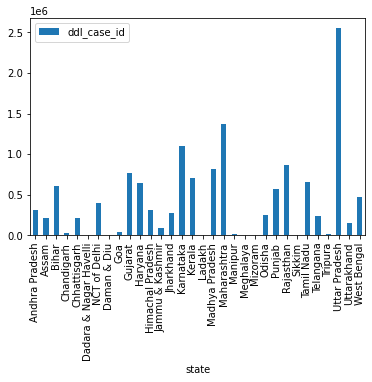

In [15]:
state_count.plot(x="state",y="ddl_case_id", kind="bar")
plt.pyplot.savefig('state_bar_2018.png')

In [16]:
shp = gpd.read_file('/kaggle/input/indian-stat/Indian_states.shp')
state_map = shp.set_index('st_nm').join(state_count.set_index('state'))
print(state_map)

                                                                   geometry  \
st_nm                                                                         
Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...   
Arunanchal Pradesh        POLYGON ((96.16261 29.38078, 96.16860 29.37432...   
Assam                     MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...   
Bihar                     MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...   
Chandigarh                POLYGON ((76.84147 30.75996, 76.83599 30.73623...   
Chhattisgarh              POLYGON ((83.33532 24.09885, 83.35346 24.09627...   
Dadara & Nagar Havelli    POLYGON ((73.20657 20.12216, 73.20797 20.10650...   
Daman & Diu               MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...   
Goa                       MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...   
Gujarat                   MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...   
Haryana                   POLYGON ((76.85065 30.8751

In [17]:
 state_map['ddl_case_id'] = state_map['ddl_case_id'].fillna(0)

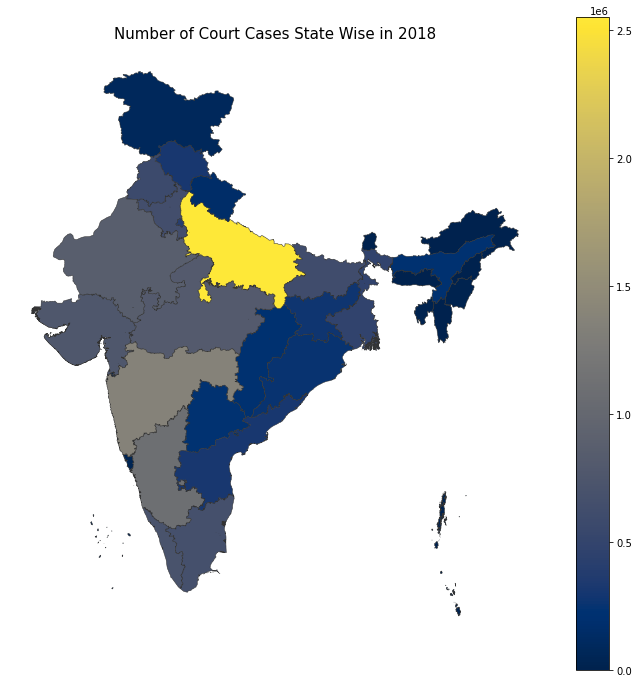

In [18]:
fig, ax = plt.pyplot.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Number of Court Cases State Wise in 2018',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = state_map.plot(column='ddl_case_id', cmap='cividis', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

plt.pyplot.savefig('state_map_2018.png')

In [19]:
state_2018 = state_map.iloc[:,[1]]
print(state_2018)

                          ddl_case_id
st_nm                                
Andaman & Nicobar Island          0.0
Arunanchal Pradesh                0.0
Assam                        212765.0
Bihar                        612675.0
Chandigarh                    35242.0
Chhattisgarh                 217706.0
Dadara & Nagar Havelli         1298.0
Daman & Diu                    1644.0
Goa                           39453.0
Gujarat                      765934.0
Haryana                      641501.0
Himachal Pradesh             315195.0
Jammu & Kashmir               86291.0
Jharkhand                    275310.0
Karnataka                   1101515.0
Kerala                       705613.0
Lakshadweep                       0.0
Madhya Pradesh               812987.0
Maharashtra                 1374670.0
Manipur                       14821.0
Meghalaya                      4038.0
Mizoram                        1365.0
Nagaland                          0.0
NCT of Delhi                 403869.0
Puducherry  

In [20]:
state_2018.to_csv('state_2018.csv')